# Introduction

Linear regression generally have the form of $Y_{i} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ...$ <br>
There are several ways to find the coefficients of the regression: <br>
1. Linear Algebra: $\hat{\theta} = (X^{T}X)^{-1}X^{T}Y$ (When X is invertible) <br>
2. Gradient Descent: In this case, we need to write out the loss function and try to minimize the loss. <br>
$\hspace{30mm}$ $F(x)$ = Loss Function = MSE = $ \frac{1}{n}\sum^{n}_{i=1} (Y_{i} - \hat{Y_{i}})^{2}$ <br>



## Import necessary packages

In [2]:
!pip3 install numpy pandas matplotlib scikit-learn
!pip3 install requests
!pip3 install certifi
!pip3 install urllib3

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Please do not change this code block
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Please make sure that your `LinearRegression.py` is under the same folder as this .ipynb notebook
from LinearRegression import Linear_Regression

In [6]:

import requests 
import urllib3

# Experiment 1: Perfect Data

In this part, we generate a dataset with a perfect linear relationship to test our model's performance. Here, we use the equation: $y = 5x + 10$ to generate our dataset.

In [5]:
X = np.array([np.arange(1, 1000, 5)]).T
y = np.array((5 * X)).flatten() +  10
f'x = {X[:5].flatten()}, y = {y[:5]} for the first 5 values'

'x = [ 1  6 11 16 21], y = [ 15  40  65  90 115] for the first 5 values'

First, let's try to fit our model without any normalization (note: the below cell block could take significant amount of time to complete)

In [53]:
%%time
reg = Linear_Regression(num_iter = 10000000)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')


Start Training
-----------------------
Iteration: 0
Coef: [[-0.73718236]
 [ 0.92645436]
 [ 0.76578362]
 [-0.59746422]
 [ 0.46955239]
 [-0.13412789]
 [ 0.56665792]
 [ 0.04049228]
 [-0.50119559]
 [-0.02852297]
 [-0.77606569]
 [-0.42014604]
 [-0.25580107]
 [ 0.64844937]]
Loss: 37632286035555.39
-----------------------
Iteration: 1000000
Coef: [[-0.33534176]
 [-0.09190535]
 [ 0.06900701]
 [-0.00973803]
 [ 0.84390654]
 [ 0.02558693]
 [ 4.38832843]
 [ 0.02407456]
 [-0.73219573]
 [ 0.16322326]
 [-0.00943609]
 [-0.07053118]
 [ 0.01809694]
 [-0.55167907]]
Loss: 13177.629714531353
-----------------------
Iteration: 2000000
Coef: [[-1.52967013e-01]
 [-9.41335272e-02]
 [ 5.52469372e-02]
 [-6.99674527e-03]
 [ 1.08556121e+00]
 [ 5.54290741e-02]
 [ 5.41725930e+00]
 [ 1.00445482e-03]
 [-8.86443173e-01]
 [ 1.78039685e-01]
 [-1.03360516e-02]
 [-3.08642815e-01]
 [ 1.59226252e-02]
 [-4.67934583e-01]]
Loss: 12417.07712477646
-----------------------
Iteration: 3000000
Coef: [[-0.02409716]
 [-0.09460995]
 [ 

Then, let's try to fit our model with min-max normalization

In [55]:
%%time
reg_norm = Linear_Regression(num_iter = 10000000, normalize=True)
reg_norm.fit(X,y)
print(f'\nNumber of total iterations: {len(reg_norm.loss)} \nBest Loss: {min(reg_norm.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[-0.04030361]
 [ 0.9819306 ]
 [-0.27387471]
 [ 0.73358039]
 [ 0.46131388]
 [ 0.09836686]
 [ 0.73249822]
 [-0.42245688]
 [ 0.39641299]
 [ 0.09872784]
 [ 0.667799  ]
 [ 0.28654427]
 [ 0.04849091]
 [ 0.65063249]]
Loss: 274273.0652677866
-----------------------
End Training (Early Stopped at iteration 24010)

Number of total iterations: 24010 
Best Loss: 11078.78457795543
CPU times: user 495 ms, sys: 2.35 ms, total: 497 ms
Wall time: 498 ms


Now, let's compare the performance between these two models with/without normalization

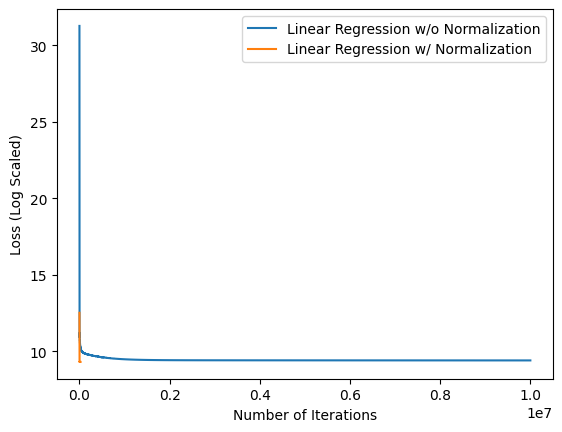

In [56]:
plt.plot(np.log(reg.loss), label='Linear Regression w/o Normalization')
plt.plot(np.log(reg_norm.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

<font color='red'>**Normalization Results**
</font>

The normalization drastically helps in fitting a model when it comes to the iteration, compute power, and overall compute time. The model without normalization did have lower Best Loss at 0.881 compared to the min-max normalization at 1.182. Without normalization, it took a whopping million iterations and 6 minutes to obtain that Best Loss and graph illustrates that it has yet to converge either. With the normalization, it only took 1383 iterations and around 30 milliseconds for it to converge. In this dataset, it appears that without normalization there was major overfiting or unstabilty of the data leading to long runtime. 

# Experiment 2: Real-World Data

After you complete the first experiment, let's see how our model performs against real-world data.

The below dataset is taken from the [Boston Housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), where there are 13 features and 1 target variable.

0. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS - proportion of non-retail business acres per town.
3. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. NOX - nitric oxides concentration (parts per 10 million)
5. RM - average number of rooms per dwelling
6. AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per \$10,000
10. PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - \% lower status of the population
13. MEDV (**TARGET VARIABLE y**) - Median value of owner-occupied homes in $1000's

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
#requests.get(url, verify=False)
#urllib3.disable_warnings(category=urllib3.exceptions.InsecureRequestWarning)
# Set `verify=False` on `requests.post`.
requests.post(url, data={'bar':'baz'}, verify=False)

df = pd.read_csv(url, delimiter='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
X, y = np.array(df.drop(13, axis=1)), np.array(df[13])

In [13]:
X.min(axis = 0)

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

Now, let's use the data to fit our model

In [11]:
%%time
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[ 0.6797099 ]
 [-0.51206179]
 [ 0.73717191]
 [-0.5289638 ]
 [-0.96764684]
 [-0.91462933]
 [-0.47827706]
 [ 0.08445286]
 [-0.59398345]
 [ 0.84963193]
 [ 0.88294711]
 [-0.27239788]
 [-0.35971169]
 [ 0.44117358]]
Loss: 298447.6646377991
-----------------------
End Training (Early Stopped at iteration 23741)

Number of total iterations: 23741 
Best Loss: 11078.78457795555
CPU times: user 506 ms, sys: 8.89 ms, total: 515 ms
Wall time: 515 ms


Let's visualize the loss curve of our model on this dataset

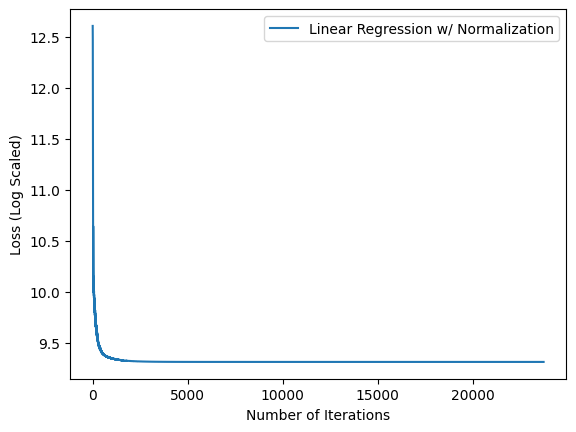

In [14]:
plt.plot(np.log(reg.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

To verify our model, we can compare our model's performance with respect to the linear regression model implemented in scikit-learn (a.k.a. `sklearn`).

In [15]:
m, n = df.shape
X_norm = X.copy()

# TODO: normalize X using the procedure in your model implementation (min max again??)
X_norm = (X - X.min()) / (X.max() - X.min())

# Let's build a model with sklearn
lr = LinearRegression()
lr.fit(X_norm,y)

#Compare Root Mean Squared Error.
print(f"Our Model's RMSE: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nSklearn Model's RMSE: {(sum((lr.predict(X_norm) - y)**2)/m)**0.5}")

Our Model's RMSE: 4.6791912956974
Sklearn Model's RMSE: 4.679191295697282


Now, let's have some tweaks with our custom model. First, let's see if an interception (i.e. bias) really helps with our model's performance on the real-world data.

In [23]:
%%time
%%capture
reg_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=True)
reg_no_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=False)
reg_bias.fit(X,y)
reg_no_bias.fit(X,y)

CPU times: user 739 ms, sys: 6.77 ms, total: 745 ms
Wall time: 746 ms


In [26]:
print(f"Our Model's RMSE with Interception: {(sum((reg_bias.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Interception: {(sum((reg_no_bias.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Interception: 8.144938760537535
Our Model's RMSE without Interception: 9.123480220412672


<font color='red'>**Intercept Conclusions**</font>


The model performs better with an intercept seen by the lower RMSE value of 8.145 compared to 9.1235. This suggests that the data does not naturally pass through the origin and that including an intercept can allow the model to better capture the underlying relationship.

Second, let's see if regularization can further help with decreasing our model's loss. Since regularization deals with the problem of overfitting, we need to check our model's performance on the "unseen" data. Here, we will split our data into two parts: `training set` and `test set`, where our model will be fit with the training set, and the performance will be evaluated based on the test set.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
m, n = X_test.shape

In [46]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X_train, y_train)
# Feel free to tune the lambda hyperparameter for better performance when penalty (regularization) is applied

reg_l1 = Linear_Regression(num_iter=100000, normalize=True, penalty='l1')
reg_l1.fit(X_train, y_train)

reg_l2 = Linear_Regression(num_iter=100000, normalize=True, penalty='l2')
reg_l2.fit(X_train, y_train)

CPU times: user 792 ms, sys: 5.68 ms, total: 798 ms
Wall time: 799 ms


In [52]:
print(f"Our Model's RMSE: {(sum((reg.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L1 Regularized Model's RMSE: {(sum((reg_l1.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L2 Regularized Model's RMSE: {(sum((reg_l2.predict(X_test).flatten() - y_test)**2)/m)**0.5}")

Our Model's RMSE: 4.552364548664678
Our L1 Regularized Model's RMSE: 4.55188983771547
Our L2 Regularized Model's RMSE: 4.573965083889759


<font color='red'> Conclusions about Regularization </font>


I can make the conclusion that regularization on this set makes a marginal difference. On the L1 regularized model it performed  better at 4.551 compared to 4.552. L1 can lead to improvement from its reducing the effects of coefficients. L2 actually performed worst and this can simply be case where the regularizer did not have an impact.

Finally, let's see the role of an adaptive learning rate. Let's see our model's performance when adaptive learning rate is disabled.

In [29]:
m, n = X.shape

In [30]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X, y)
reg_alt = Linear_Regression(num_iter=100000, normalize=True, adaptive=False)
reg_alt.fit(X, y)

CPU times: user 509 ms, sys: 7.34 ms, total: 517 ms
Wall time: 517 ms


In [31]:
print(f"Our Model's RMSE with Adaptive LR: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Adaptive LR: {(sum((reg_alt.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Adaptive LR: 4.679191295697365
Our Model's RMSE without Adaptive LR: 24.76689618642502


<font color='red'> Adaptive Learning Rate Conclusions</font>

* **Answer:**

The addition of an adaptive learning rate significantly improves the model’s performance, as seen in the drastic reduction of RMSE from 24.77 to 4.679. Without an adaptive learning rate, the model likely struggles with either overshooting optimal values or converging too slowly, leading to the large RMSE score. A fixed learning rate can be problematic if it is too large, the model oscillates or diverges, while if it is too small, the model converges inefficiently, requiring excessive iterations. By dynamically adjusting the step size, an adaptive learning rate ensures efficient and stable learning, preventing divergence and improving accuracy. I have worked with adaptive learning rates before. I worked with backtracking before and learned that the learning rate is at most luck. We used an adaptive learning technique named backtracking. 